# Machine Learning approach

To meet the objective we need to select a model that fits the data properly.
Following are the steps that will be applied:

*To arrange the dataset into training set and testing set.Size of out-of-sample data is 40% of the dataset.

*To measure different evaluation metrics inorder to identify the best model.

*Model evaluation by calclating accuracy and mean-squared error.

*To predict the probability of a random data set.
 




In [103]:
#Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [104]:
#Loading data set
data = pd.read_csv("SMS_Final_dataset.csv",index_col=0)
print data.head()


   Type                                            Message  Length  Exclaim  \
0     0  @@.comGo until jurong point  crazy.. Available...     117        0   
1     0                      Ok lar... Joking wif u oni...      29        0   
2     1  Free entry in 2 a wkly comp to win FA Cup fina...     155        0   
3     0  U dun say so early hor... U c already then say...      49        0   
4     0  Nah I don't think he goes to usf  he lives aro...      61        0   

   Link  Has_large_number  Uppercase_letters  
0     0                 0                  3  
1     0                 0                  2  
2     0                 1                 10  
3     0                 0                  2  
4     0                 0                  2  


In [105]:
#Data Exploration
print data.describe()

              Type       Length      Exclaim         Link  Has_large_number  \
count  5081.000000  5081.000000  5081.000000  5081.000000       5081.000000   
mean      0.135603    80.865578     0.254281     0.003739          0.108050   
std       0.342400    60.191602     0.701442     0.061042          0.310474   
min       0.000000     2.000000     0.000000     0.000000          0.000000   
25%       0.000000    36.000000     0.000000     0.000000          0.000000   
50%       0.000000    62.000000     0.000000     0.000000          0.000000   
75%       0.000000   124.000000     0.000000     0.000000          0.000000   
max       1.000000   910.000000    11.000000     1.000000          1.000000   

       Uppercase_letters  
count        5081.000000  
mean            5.645345  
std            11.673806  
min             0.000000  
25%             1.000000  
50%             2.000000  
75%             4.000000  
max           129.000000  


In [106]:
#Pairwise correlation of dataFrame columns
data.corr()


,Type,Length,Exclaim,Link,Has_large_number,Uppercase_letters
Type,1.000000,0.383561,0.271129,0.154681,0.869486,0.333624
Length,0.383561,1.000000,0.270086,0.053070,0.351609,0.383414
Exclaim,0.271129,0.270086,1.000000,0.037555,0.261588,0.289733
Link,0.154681,0.053070,0.037555,1.000000,0.040997,0.052138
Has_large_number,0.869486,0.351609,0.261588,0.040997,1.000000,0.300006
Uppercase_letters,0.333624,0.383414,0.289733,0.052138,0.300006,1.000000


From the correlation matrix above, all the correlation values are above 0.01, hence all variables will have influence on the outcome. As a result all the variables will be considered in the statistical approach.

In [107]:
print(data.groupby('Type').mean())

          Length   Exclaim      Link  Has_large_number  Uppercase_letters
Type                                                                     
0      71.722222  0.178962  0.000000          0.001138           4.102914
1     139.149492  0.734398  0.027576          0.789550          15.477504


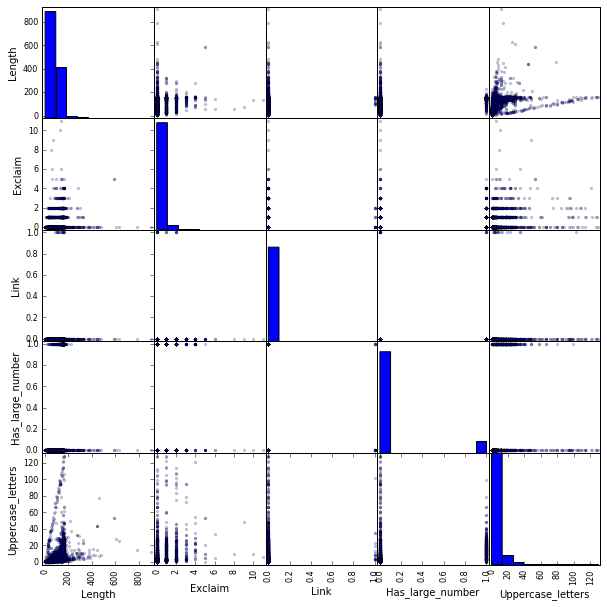

In [108]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
X1 = data[['Length','Exclaim','Link','Has_large_number','Uppercase_letters']]
ax = scatter_matrix(X1, alpha=0.2,figsize=(10,10), diagonal='hist')

# Model selection

This project has used supervised learning approach. Classifiers used:

*Logistic regression

*Support vector classifier




In [109]:

y, X = dmatrices('Type ~ Length + Exclaim + Link + Has_large_number + Uppercase_letters',data, return_type="dataframe")
print X.columns
print X
print y

Index([u'Intercept', u'Length', u'Exclaim', u'Link', u'Has_large_number',
       u'Uppercase_letters'],
      dtype='object')
      Intercept  Length  Exclaim  Link  Has_large_number  Uppercase_letters
0           1.0   117.0      0.0   0.0               0.0                3.0
1           1.0    29.0      0.0   0.0               0.0                2.0
2           1.0   155.0      0.0   0.0               1.0               10.0
3           1.0    49.0      0.0   0.0               0.0                2.0
4           1.0    61.0      0.0   0.0               0.0                2.0
5           1.0   148.0      2.0   0.0               0.0                7.0
6           1.0    77.0      0.0   0.0               0.0                2.0
7           1.0   160.0      0.0   0.0               0.0               10.0
8           1.0   158.0      3.0   0.0               1.0               12.0
9           1.0   154.0      1.0   0.0               1.0               14.0
10          1.0   109.0      0.0   0.0

In [110]:
#Flatten y into a 1-D array
y = np.ravel(y)
print y


[ 0.  0.  1. ...,  0.  0.  0.]


# Logistic regression

In [111]:
#Instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

#Check the score on the training set
print 'Score:',model.score(X, y)

#Examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

Score: 0.97165912222


,0,1
0,Intercept,[-2.10078776252]
1,Length,[0.00642710474009]
2,Exclaim,[0.221861311879]
3,Link,[3.72023608646]
4,Has_large_number,[6.71024273324]
5,Uppercase_letters,[0.018950443822]


Evaluating the performance of a model by training and testing on the same dataset can lead to overfitting.Hence below model evaluation is based on splitting the dataset into train and validation set. We have sampled a training set while holding out 40% of the data for testing (evaluating) our classifier.

In [112]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 1234)
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid = GridSearchCV(logreg,param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X_train,y_train)

print 'Grid Scores :',(grid.best_params_)
print'Best Score : ',(grid.best_score_)
print 'Best Parameters :',(grid.best_params_)
print'Best Estimator :',(grid.best_estimator_)

C_best_score = grid.best_score_
clf_best = LogisticRegression(C = C_best_score)
clf_best.fit(X_train,y_train)
print 'Accuracy Score :', accuracy_score(clf_best.predict(X_test),y_test)
print 'Coefficients :',grid.best_estimator_.coef_ 
mse = mean_squared_error(y_test, clf_best.predict(X_test))
rmse = np.sqrt(mse)
print 'Mean-squared error', rmse

Grid Scores : {'C': 10}
Best Score :  0.969816272966
Best Parameters : {'C': 10}
Best Estimator : LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy Score : 0.971962616822
Coefficients : [[-2.17892318  0.00861871  0.21550429  5.04082872  7.91937265  0.01826863]]
Mean-squared error 0.167443671656


In [113]:
#Predicting probability of random data set being spam or ham.
print 'Probability :',grid.predict_proba([1,10,0,0,0,1])

Probability : [[ 0.98598331  0.01401669]]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [114]:
#Applying statsmodels function to apply logistic regression

logit = sm.Logit(y,X).fit()
print(logit.summary())
print(model.score(X, y))


         Current function value: 0.113600
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5081
Model:                          Logit   Df Residuals:                     5075
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Oct 2016   Pseudo R-squ.:                  0.7138
Time:                        16:22:32   Log-Likelihood:                -577.20
converged:                      False   LL-Null:                       -2016.7
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            -4.2993      0.140    -30.807      0.000        -4.573    -4.026
Length                0.0064      0.001     

C:\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Support Vector Classifer (SVC)

In [115]:
#Applying SVM on dataset
X1 = X
y1 = y
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 1234)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
clf= svm.SVC(probability=True)
clf.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
param_grid = [{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
grid = GridSearchCV(clf,param_grid,cv = 3,scoring = 'accuracy')
grid.fit(X1_train,y1_train)

In [ ]:
print grid.fit(X_test,y_test)
print'Best Score : ',(grid.best_score_)
print 'Best Parameters :',(grid.best_params_)
print'Best Estimator :',(grid.best_estimator_)
y1_pred = grid.predict(X1_test)
print y1_pred
print y1_test
print 'svc - accuracy score:',accuracy_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
print 'Mean-squared error', rmse

In [ ]:
#Predicting probability of given data set being spam or ham.
k = grid.predict_proba([1,10,0,0,0,1])
print k

# Result

*The accuracy scores ranges between .971 and .979.

*Mean squared error ranges between .143 and .167.